# MNIST neural Network Assignment - complete Solution

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# MNIST load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# preprocessing
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

In [5]:
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

In [6]:
#  create a model
model = Sequential()
model.add(Dense(units = 512, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train_categorical, epochs=20, batch_size = 128, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.7492 - loss: 0.7781 - val_accuracy: 0.9650 - val_loss: 0.1241
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9351 - loss: 0.2249 - val_accuracy: 0.9732 - val_loss: 0.0911
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9523 - loss: 0.1622 - val_accuracy: 0.9778 - val_loss: 0.0758
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9603 - loss: 0.1313 - val_accuracy: 0.9778 - val_loss: 0.0704
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9660 - loss: 0.1155 - val_accuracy: 0.9815 - val_loss: 0.0690
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9679 - loss: 0.1051 - val_accuracy: 0.9805 - val_loss: 0.0684
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9698 - loss: 0.0979 - val_accuracy: 0.9813 - val_loss: 0.0630
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9738 - loss: 0.0871 - val_acc

In [9]:
# Evaluation
score = model.evaluate(x_test, y_test_categorical)
print("\nTest loss:", score[0])
print("Test accuracy: ", score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0788

Test loss: 0.06217091530561447
Test accuracy:  0.9836000204086304


In [10]:
#prediction

predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


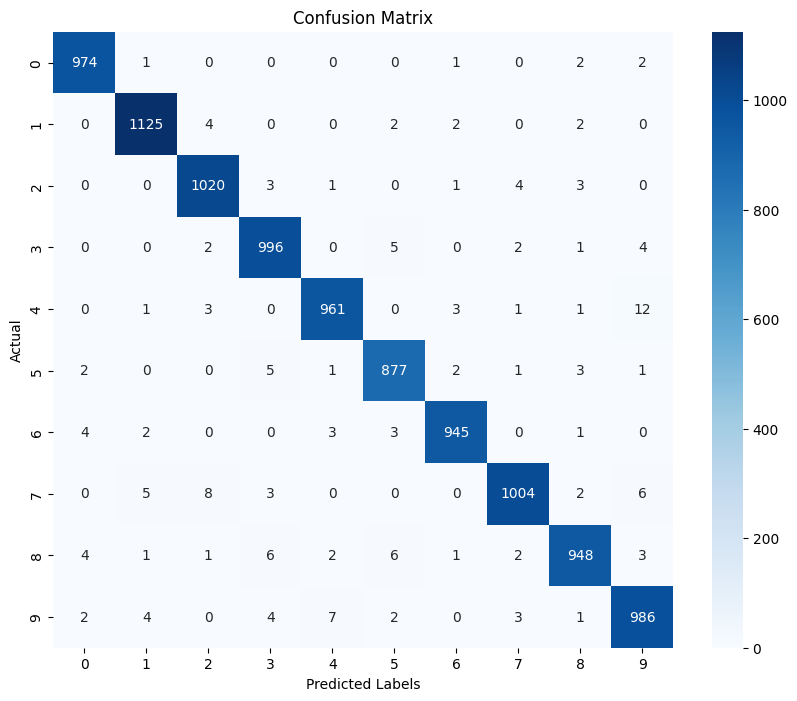

In [11]:
# Confusion metrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

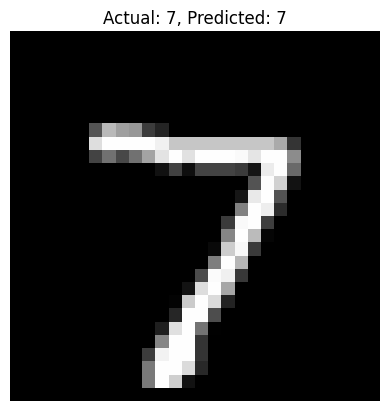

In [12]:
# plot the images with prediction
def show_prediction(index):
  plt.imshow(x_test[index].reshape(28, 28), cmap = 'gray')
  plt.title(f"Actual: {y_test[index]}, Predicted: {predicted_labels[index]}")
  plt.axis('off')
  plt.show()

show_prediction(0)